# Weather Data Analysis Project

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Import preprocessing tools.
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling.
from sklearn.model_selection import train_test_split  # Import for data splitting.
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import evaluation metrics.

Matplotlib is building the font cache; this may take a moment.


In [2]:
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [3]:
# Import and read the weather data from a CSV file
df = pd.read_csv("Weather Data.csv")

# Display the first few rows of the DataFrame
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Data Preprocessing

In [6]:
# Rename columns for clarity
df.rename(columns={
    'Date/Time': 'DateTime',
    'Temp_C': 'Temperature_Celsius',
    'Dew Point Temp_C': 'Dew_Point_Temperature_Celsius',
    'Rel Hum_%': 'Relative_Humidity_Percentage',
    'Visibility_km': 'Visibility_Kilometers',
    'Press_kPa': 'Pressure_kPa',
    'Weather': 'Weather_Description'
}, inplace=True)

# Display the column names after renaming
df.columns

Index(['DateTime', 'Temperature_Celsius', 'Dew_Point_Temperature_Celsius',
       'Relative_Humidity_Percentage', 'Wind Speed_km/h',
       'Visibility_Kilometers', 'Pressure_kPa', 'Weather_Description'],
      dtype='object')

In [7]:
# Convert the 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Display data types of the DataFrame
df.dtypes

DateTime                         datetime64[ns]
Temperature_Celsius                     float64
Dew_Point_Temperature_Celsius           float64
Relative_Humidity_Percentage              int64
Wind Speed_km/h                           int64
Visibility_Kilometers                   float64
Pressure_kPa                            float64
Weather_Description                      object
dtype: object

In [8]:
# Count and display the null values in each column
null_values = df.isnull().sum()
null_values

DateTime                         0
Temperature_Celsius              0
Dew_Point_Temperature_Celsius    0
Relative_Humidity_Percentage     0
Wind Speed_km/h                  0
Visibility_Kilometers            0
Pressure_kPa                     0
Weather_Description              0
dtype: int64

In [9]:
# Find and count duplicate rows
duplicate_values = df[df.duplicated()]
duplicate_values.count()


DateTime                         0
Temperature_Celsius              0
Dew_Point_Temperature_Celsius    0
Relative_Humidity_Percentage     0
Wind Speed_km/h                  0
Visibility_Kilometers            0
Pressure_kPa                     0
Weather_Description              0
dtype: int64

## Exploring Dataset

In [10]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DateTime                       8784 non-null   datetime64[ns]
 1   Temperature_Celsius            8784 non-null   float64       
 2   Dew_Point_Temperature_Celsius  8784 non-null   float64       
 3   Relative_Humidity_Percentage   8784 non-null   int64         
 4   Wind Speed_km/h                8784 non-null   int64         
 5   Visibility_Kilometers          8784 non-null   float64       
 6   Pressure_kPa                   8784 non-null   float64       
 7   Weather_Description            8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


In [11]:
# Get the shape of the DataFrame (number of rows and columns)
df.shape

(8784, 8)

In [12]:
# Generate summary statistics for the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature_Celsius,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew_Point_Temperature_Celsius,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Relative_Humidity_Percentage,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_Kilometers,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Pressure_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


## Exploratory Data Analysis

In [13]:
# Calculate and display the correlation between numerical columns
df.corr()

,Temperature_Celsius,Dew_Point_Temperature_Celsius,Relative_Humidity_Percentage,Wind Speed_km/h,Visibility_Kilometers,Pressure_kPa
Temperature_Celsius,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew_Point_Temperature_Celsius,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Relative_Humidity_Percentage,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_Kilometers,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Pressure_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


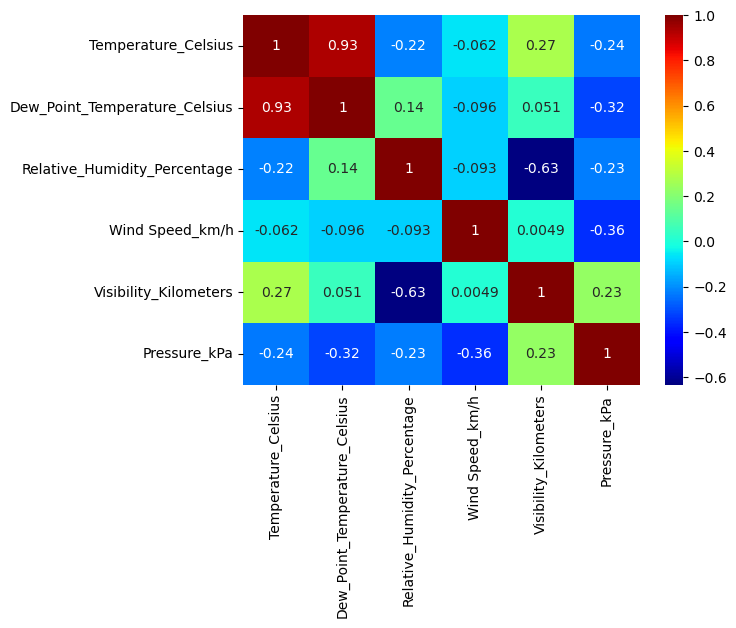

In [14]:
# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, cmap='jet')
plt.show()

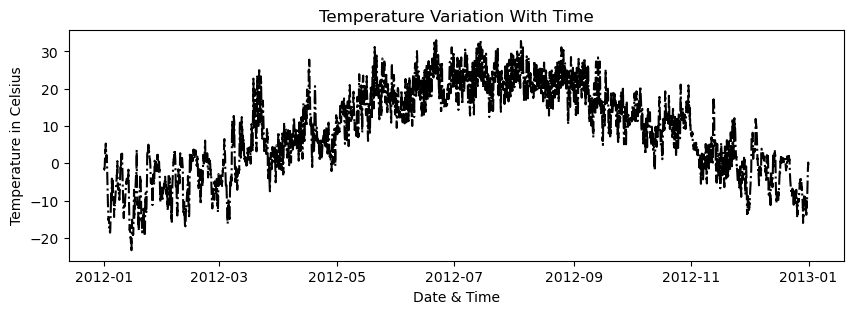

In [15]:
# Set the figure size
plt.figure(figsize=(10,3))

# Create a line plot for temperature data
sns.lineplot(x='DateTime', y='Temperature_Celsius', data=df, color='black', linestyle='dashdot')

# Set the title and labels
plt.title('Temperature Variation With Time')
plt.xlabel('Date & Time')
plt.ylabel('Temperature in Celsius')

# Show the plot
plt.show()

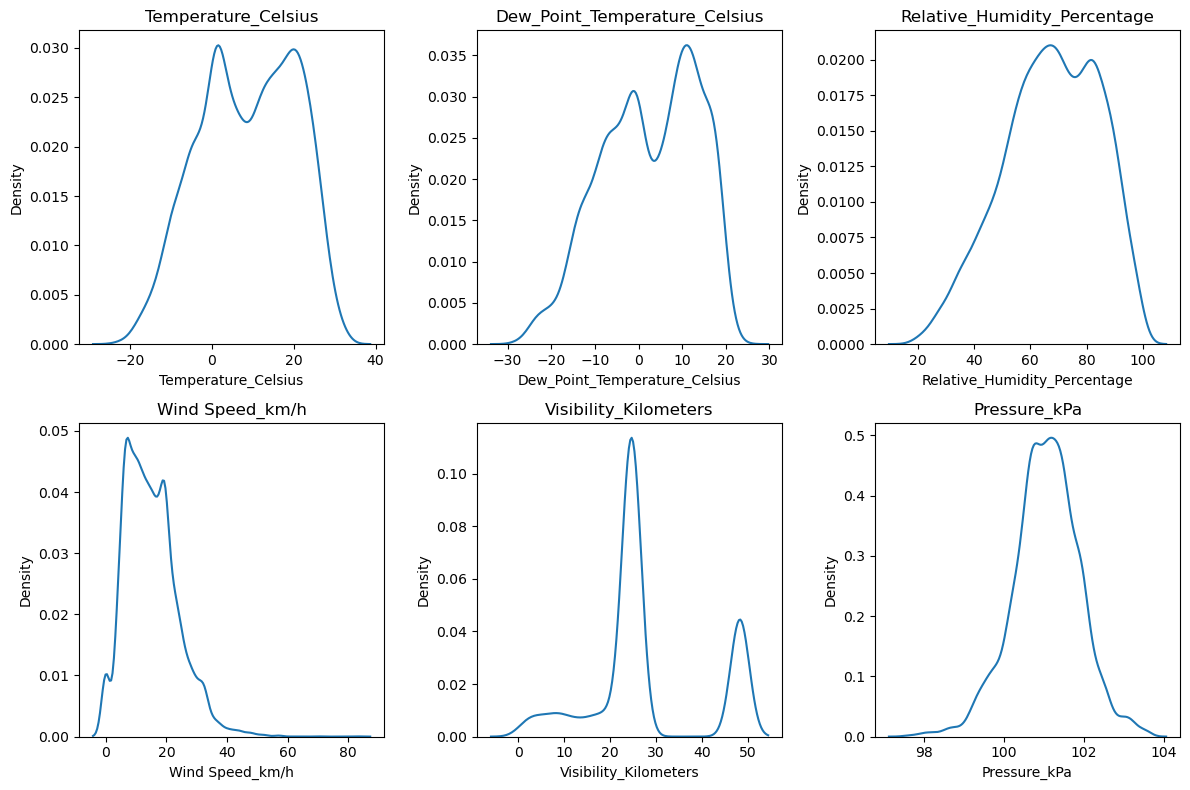

In [16]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through numeric columns and create distplot
for i, col in enumerate(df.select_dtypes(np.number).columns, 1):
    plt.subplot(2, 3, i)
    sns.distplot(df[col], hist=False)
    plt.title(col)

# Adjust subplot layout and display the plot
plt.tight_layout()
plt.show()

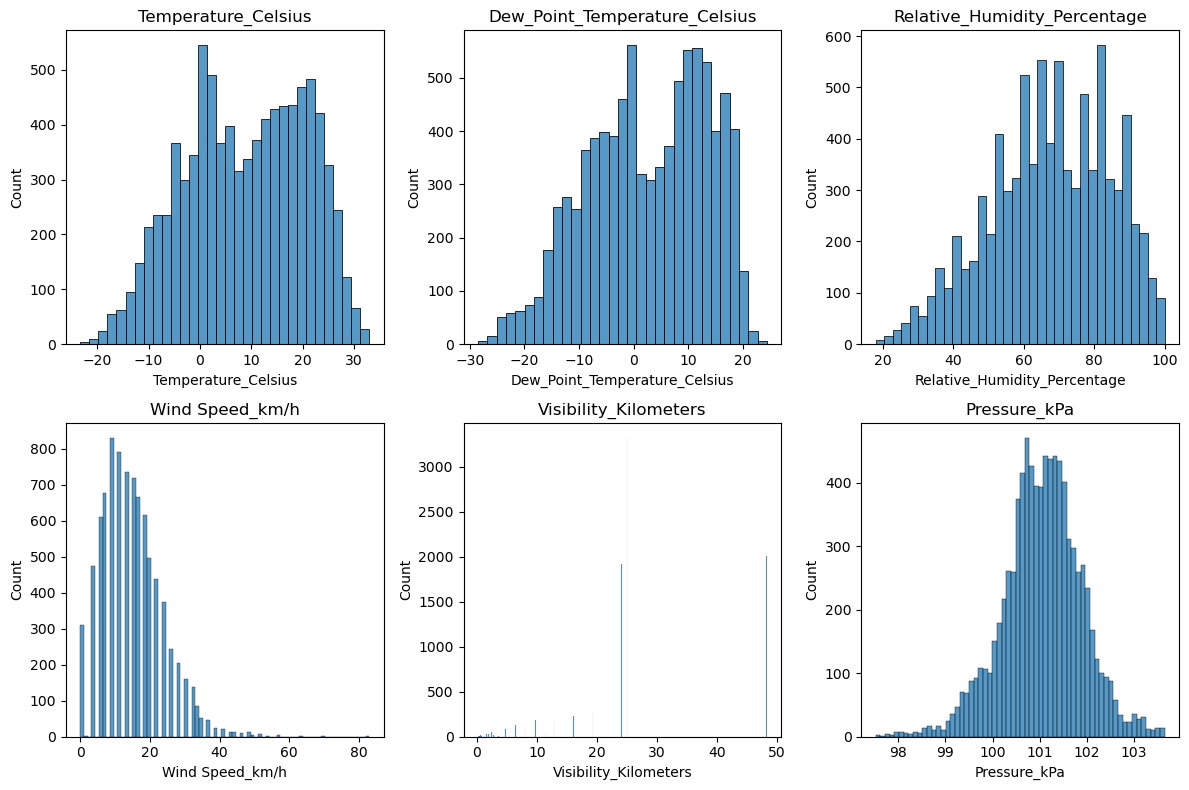

In [17]:
# Set the figure size
plt.figure(figsize=(12, 8)) 

# Loop through numeric columns and create histogram
for i, col in enumerate(df.select_dtypes(np.number).columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col])
    plt.title(col)  

# Adjust subplot layout and display the plot
plt.tight_layout()  
plt.show()


## Checking inconsistent weather description data

In [18]:
# Get unique weather descriptions from the 'Weather_Description' column
weather_unique_values = df['Weather_Description'].unique()
# Print the unique weather descriptions
print(weather_unique_values)

['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rain,Snow,Fog'
 'Moderate Rain,Fog' 'Freezing Rain,Ice Pellets,Fog'
 'Drizzle,Ice Pellets,Fog' 'Drizzle,Snow' 'Rain,Ice Pellets'
 'Drizzle,Snow,Fog' 'Rain,Snow Grains' 'Rain,Snow,Ice Pellets'
 'Snow Showers,Fog' 'Moderate Snow,Blowing Snow']


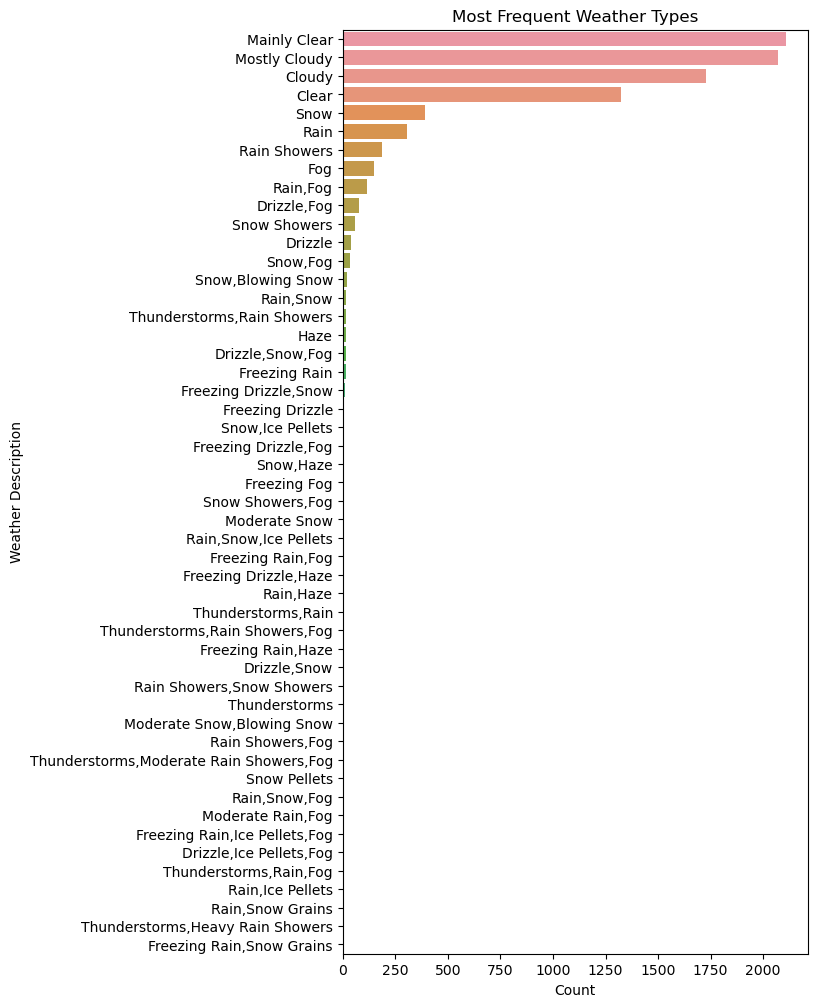

In [19]:
# Set the figure size
plt.figure(figsize=(6,12))

# Create a countplot of 'Weather_Description' column 
sns.countplot(y='Weather_Description', data=df, order=df['Weather_Description'].value_counts().index)

# Set the title and labels
plt.xlabel('Count')
plt.ylabel('Weather Description')
plt.title('Most Frequent Weather Types')

# Show the plot
plt.show()

## Standardizing Weather Description

In [20]:
#Replace 'Mainly Clear' with 'Sunny'
df.Weather_Description.replace(to_replace='Mainly Clear',value='Sunny',inplace=True)

#Replace 'Mostly Cloudy' with 'Cloudy'
df.Weather_Description.replace(to_replace='Mostly Cloudy',value='Cloudy',inplace=True)

#Replace various snow-related descriptions with 'Snowy'
df.Weather_Description.replace(to_replace=['Snow Showers','Snow,Blowing Snow','Rain,Snow','Freezing Drizzle,Snow',
                                           'Freezing Rain,Snow Grains','Snow,Ice Pellets','Moderate Snow',
                                           'Rain,Snow,Ice Pellets','Drizzle,Snow','Rain Showers,Snow Showers',
                                           'Moderate Snow,Blowing Snow','Snow Pellets','Rain,Snow Grains'],
                               value='Snowy',inplace=True)

#Replace various rainy descriptions with 'Rainy'
df.Weather_Description.replace(to_replace=['Rain Showers','Freezing Rain','Rain,Ice Pellets'],value='Rainy',inplace=True)

#Replace 'Freezing Drizzle' with 'Drizzle'
df.Weather_Description.replace(to_replace='Freezing Drizzle',value='Drizzle',inplace=True)

#Replace various fog-related descriptions with 'Fog'
df.Weather_Description.replace(to_replace=['Rain,Fog','Drizzle,Fog','Snow,Fog','Drizzle,Snow,Fog','Freezing Drizzle,Fog',
                                           'Freezing Fog','Snow Showers,Fog','Freezing Rain,Fog','Rain,Snow,Fog',
                                           'Rain Showers,Fog','Thunderstorms,Moderate Rain Showers,Fog','Moderate Rain,Fog',
                                           'Freezing Rain,Ice Pellets,Fog','Drizzle,Ice Pellets,Fog','Thunderstorms,Rain,Fog',
                                           'Thunderstorms,Rain Showers,Fog'],value='Fog',inplace=True)

#Replace various thunderstorm-related descriptions with 'Thunderstorms'
df.Weather_Description.replace(to_replace=['Thunderstorms,Rain Showers','Thunderstorms,Rain',
                               'Thunderstorms,Heavy Rain Showers'],value='Thunderstorms',inplace=True)

#Replace various haze-related descriptions with 'Haze'
df.Weather_Description.replace(to_replace=['Snow,Haze','Rain,Haze','Freezing Drizzle,Haze','Freezing Rain,Haze',],
                               value='Haze',inplace=True)


In [21]:
# Count occurrences of each weather description
df['Weather_Description'].value_counts()

Cloudy           3797
Sunny            2106
Clear            1326
Fog               426
Snow              390
Rain              306
Rainy             203
Snowy             131
Drizzle            48
Haze               29
Thunderstorms      22
Name: Weather_Description, dtype: int64

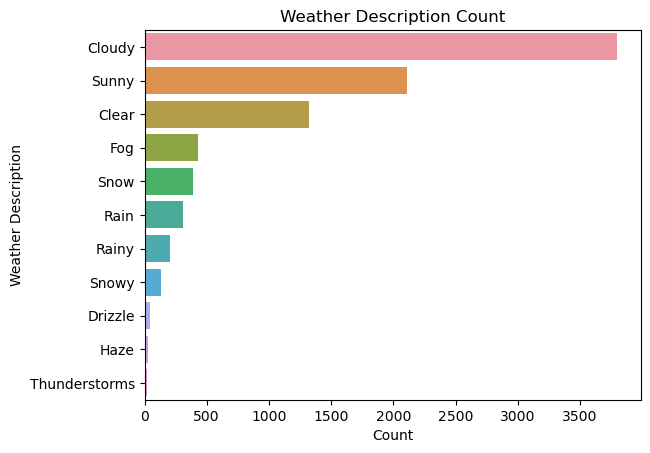

In [22]:
# Create a countplot for 'Weather_Description'
sns.countplot(y='Weather_Description', data=df, order=df['Weather_Description'].value_counts().index)

# Set the title and labels
plt.xlabel('Count')
plt.ylabel('Weather Description')
plt.title('Weather Description Count')

# Show the plot
plt.show()

## Outlier Detection

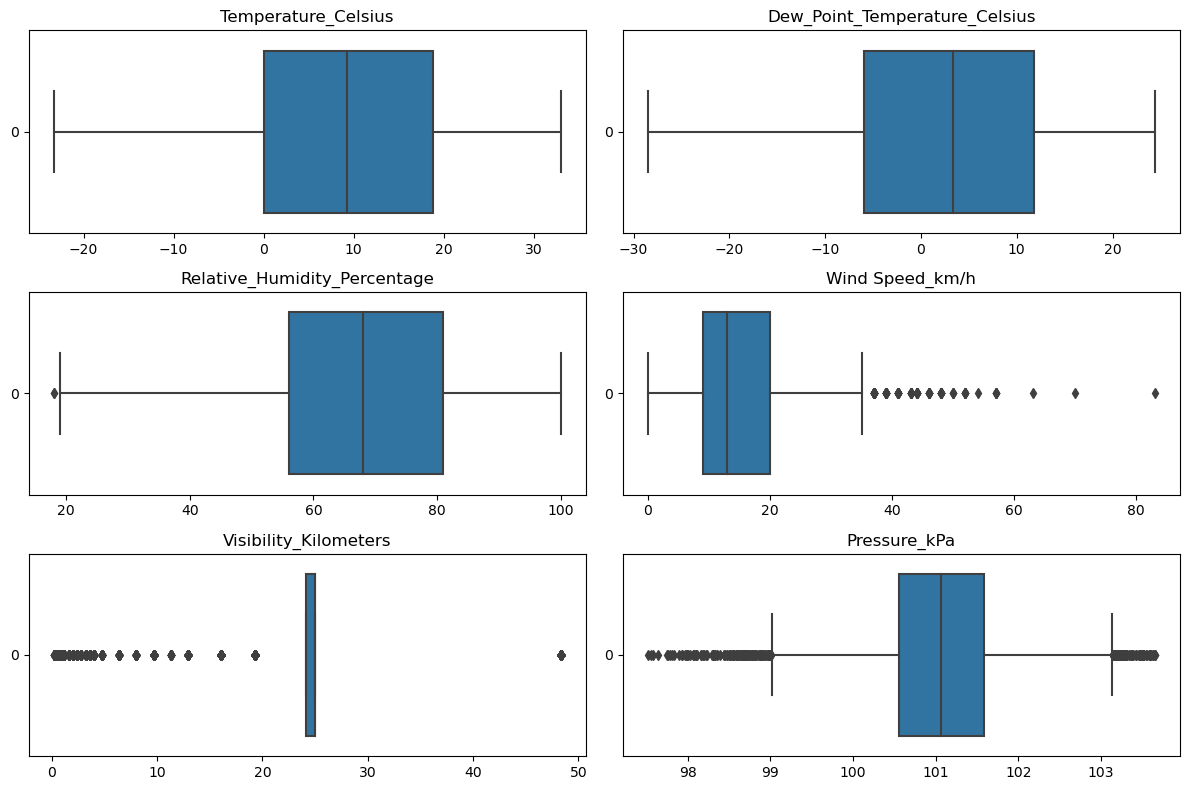

In [23]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through numeric columns and create boxplot
for i, col in enumerate(df.select_dtypes(np.number).columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(df[col],orient='h')
    plt.title(col)  

# Adjust subplot layout and display the plot
plt.tight_layout()  
plt.show()

## Handling Outliers

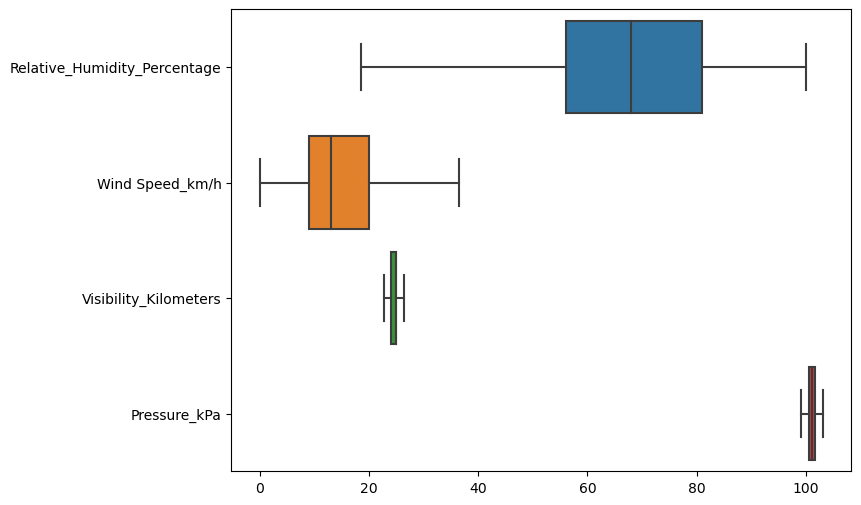

In [24]:
# List of columns to process for removing outliers
columns_to_process = ['Pressure_kPa', 'Visibility_Kilometers', 'Wind Speed_km/h', 'Relative_Humidity_Percentage']

# Function to remove outliers from a specified column
def remove_outliers(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])  # Calculate 1st and 3rd quartiles
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound
    # Replace outliers with bounds
    return np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col]))  
# Loop through columns to process and Remove outliers from each column
for col in columns_to_process:
    df[col] = remove_outliers(df,col)
# Set figure size
plt.figure(figsize=(8,6))

# Create a horizontal boxplot for specified columns
sns.boxplot(df[["Relative_Humidity_Percentage", 'Wind Speed_km/h', 'Visibility_Kilometers', 'Pressure_kPa']], orient='h')

# Display the plot
plt.show()

## Data Preprocessing

### Removing Redundant Column

In [25]:
# Remove 'DateTime' column from the DataFrame
df.drop(['DateTime'],inplace=True,axis=1)

### Encoding Categprical Data

In [26]:
# Encode 'Weather_Description' using LabelEncoder
le=LabelEncoder()
df['Weather_Description']=le.fit_transform(df['Weather_Description'])
df.head()

,Temperature_Celsius,Dew_Point_Temperature_Celsius,Relative_Humidity_Percentage,Wind Speed_km/h,Visibility_Kilometers,Pressure_kPa,Weather_Description
0,-1.8,-3.9,86.0,4.0,22.75,101.24,3
1,-1.8,-3.7,87.0,4.0,22.75,101.24,3
2,-1.8,-3.4,89.0,7.0,22.75,101.26,3
3,-1.5,-3.2,88.0,6.0,22.75,101.27,3
4,-1.5,-3.3,88.0,7.0,22.75,101.23,3


### Data Splitting and balancing

In [27]:
# Split features (x)
x=df.iloc[:,:-1]
x.head()

,Temperature_Celsius,Dew_Point_Temperature_Celsius,Relative_Humidity_Percentage,Wind Speed_km/h,Visibility_Kilometers,Pressure_kPa
0,-1.8,-3.9,86.0,4.0,22.75,101.24
1,-1.8,-3.7,87.0,4.0,22.75,101.24
2,-1.8,-3.4,89.0,7.0,22.75,101.26
3,-1.5,-3.2,88.0,6.0,22.75,101.27
4,-1.5,-3.3,88.0,7.0,22.75,101.23


In [28]:
# Split target (y)
y=df.iloc[:,-1]
y.value_counts()

1     3797
9     2106
0     1326
3      426
7      390
5      306
6      203
8      131
2       48
4       29
10      22
Name: Weather_Description, dtype: int64

In [29]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x,y = smote.fit_resample(x, y)

### Feature Scaling

In [30]:
# Scale the features using MinMaxScaler
ms=MinMaxScaler()
xsc=ms.fit_transform(x)
xsc

array([[0.38188277, 0.46502836, 0.82822086, 0.10958904, 0.        ,
        0.54004854],
       [0.38188277, 0.46880907, 0.8404908 , 0.10958904, 0.        ,
        0.54004854],
       [0.38188277, 0.47448015, 0.86503067, 0.19178082, 0.        ,
        0.54490291],
       ...,
       [0.82077606, 0.897156  , 0.73312025, 0.36845867, 0.59383741,
        0.39236693],
       [0.79883822, 0.88543463, 0.76747687, 0.41917311, 0.        ,
        0.17475948],
       [0.83475251, 0.94832706, 0.8631862 , 0.38973937, 0.17340707,
        0.19565412]])

In [31]:
# Split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(xsc,y,test_size=0.1,random_state=4)

## Random Forest Classification

### Initializing and Training Model

In [34]:
# Initialize the Random Forest Classifier
rfc=RandomForestClassifier(random_state=40)

# Fit the model to the training data
rfc.fit(xtrain,ytrain)

RandomForestClassifier(random_state=40)

### Model Predictions

In [35]:
# Make predictions on the test data
ypred=rfc.predict(xtest)

# Display the first 20 predictions
ypred[:20]

array([ 6,  5,  9,  4,  3,  1,  3,  6, 10, 10, 10,  0,  8,  2,  0,  7,  3,
        0,  1,  6])

### Model Evaluation

In [36]:
# Calculate and print the training and testing accuracy
train=rfc.score(xtrain,ytrain)
test=rfc.score(xtest,ytest)
print(train)
print(test)

1.0
0.9085468039262629


In [37]:
# Calculate and print the accuracy score, confusion matrix, and classification report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print("Random Forest Accuracy Score:",ac)
print('--------------------------------------------------------------------------\n')
print("Random Forest Confusion Matrix:\n\n",cm)
print('--------------------------------------------------------------------------\n')
print("Random Forest Classification Report:\n\n",cr)

Random Forest Accuracy Score: 0.9085468039262629
--------------------------------------------------------------------------

Random Forest Confusion Matrix:

 [[353  20   0   3   0   0   2   0   2  41   0]
 [ 27 267   1   5   0   8  18   6   3  58   0]
 [  0   0 384   3   0   0   1   1   4   0   0]
 [  0   2   4 373   0   5   1   2   1   0   1]
 [  0   0   0   0 353   0   0   1   0   0   0]
 [  1   5   0   8   1 352   6   1   0   0   0]
 [  1   7   2   1   0   1 355   1   2   0   1]
 [  0   1   0   4   0   1   3 350  10   1   0]
 [  0   0   1   2   0   1   0   2 351   0   0]
 [ 34  51   0   3   0   1   6   1   0 259   0]
 [  0   0   0   1   0   0   0   0   0   1 398]]
--------------------------------------------------------------------------

Random Forest Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.84      0.84       421
           1       0.76      0.68      0.72       393
           2       0.98      0.98      0.98  

#### Based on the Random Forest model evaluation, the following conclusions can be drawn:

*The Random Forest model achieved a high accuracy score of about 90.8%.<br>
*The confusion matrix shows how the model performed in terms of classifying different weather descriptions<br>
*The classification report provides more detailed insights into the model's performance for each class. It includes metrics like precision, recall, and F1-score.<br>
*Conclusively, the Random Forest model is quite effective in classifying weather descriptions, as indicated by the high accuracy score and strong performance metrics in the classification report.
 